# Clustering by DBSCAN (Density-Based Spatial Clustering of Applications with Noise)


The K-Means and Gaussian Mixture Model (GMM) clustering algorithms suffer from the following **two limitations**.
     - Minimal requirements of domain knowledge to determine the input parameters (e.g., number of clusters).
     - Unable to discover clusters of arbitrary shape (non-spherical or non-Gaussian). 
     
<img src="https://cse.unl.edu/~hasan/Pics/Clusters-Spherical-ArbitraryShaped.png" width=600, height=300>

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) clustering algorithm is able to overcome these two limitations.
- It infers the number of clusters based on the data.
- It can discover clusters of arbitrary shape.

DBSCAN relies on a **density-based** notion of clusters which is designed to discover clusters of arbitrary shape. It can be used for **anomaly/outlier detection** as well.

The DBSCAN algorithm defines clusters as continuous regions of high density. 


Below we provide a preliminary to understand various aspects of the DBSCAN model.


## DBSCAN: Preliminary

The DBSCAN algorith two parameters:

- eps (epsilon $\epsilon$): The radius of the neighborhoods around a data point p.
- min_samples: The minimum number of data points we want in a neighborhood to define a cluster.
     
For each instance, the algorithm counts how many instances are located within a small distance $\epsilon$ (epsilon) from it. This region is called the instance’s $\epsilon-neighborhood$.

<img src="https://cse.unl.edu/~hasan/Pics/DBSCAN.png" width=400, height=200>

The DBSCAN algorithm involves three different types of points.

- **Core Point**

A point $p$ is a if at least min_samples points are within distance eps $\epsilon$ of it (including p).

The min_samples points are the minimum number of neighbors a given point should have in order to be classified as a core point. 

Point A and the other red points are core points, because the area surrounding these points in an ε radius contain at least 4 points (including the point itself). 

The clusters are built around the core points.

So by adjusting the min_samples parameter, we can fine-tune how dense our clusters must be.

All instances in the neighborhood of a core point belong to the same cluster. This neighborhood may include other core points. Therefore, a long sequence of neighboring core points forms a single cluster (red points).

- **Border Points**

The yellow points are non-core or border points. These points are within epsilon radius of core points but do not contain minimum number of neighbors.


- **Noise/Anomaly/Outlier Points**
Any instance that is not a core point and nor are they close enough to a cluster to be density-reachable from a core point is considered a noise/anomaly/outlier (blue point).


### Time-Complexity

DBSCAN visits each point of the database, possibly multiple times (e.g., as candidates to different clusters).

For each point it scans all points in the dataset, computes distance and check epsilon.

- Thus, the worst-case run-time complexity is $O(n^2)$. 

If an **indexing structure** is used that executes a neighborhood query in $O(log n)$. 

- Thus, an overall average run-time complexity is: $O(n log n)$.


### Limitations

- Due to its distance-based calculation, DBSCAN suffers from the **curse of dimensionality**.

- DBSCAN cannot cluster data sets well with **large differences in densities**.

        This is because the min_samples-eps combination cannot then be chosen appropriately for all clusters.

- DBSCAN cannot cluster datasets well with **similar densities** when there is a **significant overlap** in the distributions.


        Please note that irrespective of these limitations, DBSCAN is a powerful tool for both clustering and anomaly detection.


### Task

In this notebook we use Scikit-Learn's DBSCAN object to **discover clusters from an arbitrary shaped data**.


In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.cluster import DBSCAN
from sklearn.datasets import make_circles

## Synthetic Dataset

To create **arbitrary shaped clusters** we use Scikit-Learn's "datasets.make_circles" function.

It creates a large circle containing a smaller circle in 2D.

The following two parameters are used by the make_circles function:

- factor : Scale factor between inner and outer circle. Range 0 ~ 1.

- noise : Standard deviation of Gaussian noise added to the data.

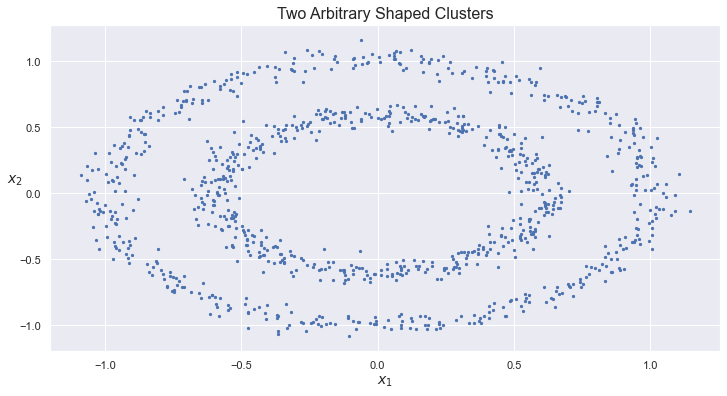

In [5]:
X, y = make_circles(n_samples=1000, noise=0.05, factor=0.6)

plt.figure(figsize=(12, 6))
plt.scatter(X[:, 0], X[:, 1], c=None, s=5, cmap='autumn')

plt.title("Two Arbitrary Shaped Clusters", fontsize=16)
plt.xlabel("$x_1$", fontsize=14)
plt.ylabel("$x_2$", fontsize=14, rotation=0)
plt.show()

## DBSCAN

The DBSCAN algorithm requires us to specify the following two hyperparameters:

- eps 

        The maximum distance between two samples for one to be considered as in the neighborhood of the other. This is not a maximum bound on the distances of points within a cluster. 

- min_samples

        The number of samples (or total weight) in a neighborhood for a point to be considered as a core point. This includes the point itself.
        
        
### How do we set these two parameters?
        
Setting the values of these two parameters is very tricky. There is no automated way to do it. We need to decide based on the kind of data that we are using.

***eps***: 
- Very small value: There wouldn’t be enough points in a region to form a cluster. It would make **most of the points outliers**. 
- Very large value: The majority of the points would fall into one cluster. There would be **almost no outliers**. 

        Thus, we need to select the value wisely. More often or not, a smaller value is preferred for eps.


***min_samples***: 
- Very large value: It would need more points to form a cluster. Then, it would leave a **major chunk of points as outliers**. 
- Very small value: It would make clusters form even for what could have been an outlier.


The values of these two parameters depend on the kind of data and the expectation of the model.

In [10]:
dbscan = DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(X)

DBSCAN(eps=0.05)

## Cluster Labels

The labels of all the instances are now available in the labels_ instance variable.

We see that some instances have a cluster index equal to –1, which means that they are considered as **anomalies** by the algorithm. 

- The indices of the core instances are available in the core_sample_indices_ instance variable.
- The core instances themselves are available in the components_ instance variable:

In [16]:
#print(dbscan.labels_)
np.unique(dbscan.labels_)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32,
       33, 34, 35, 36, 37, 38, 39, 40, 41, 42], dtype=int64)

In [17]:
# number of clusters

np.unique(dbscan.labels_).size

44

##  Clustering: Observation

Notice that 41 clusters are created, which is clearly incorrect.

Let's see the plot of the clusters.

## Plot the Clusters

We use the following function to plot the clusters discovered by DBSCAN.

In [18]:
def plot_dbscan(dbscan, X, size, show_xlabels=True, show_ylabels=True):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)

    cores = dbscan.components_
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]
    
    plt.scatter(cores[:, 0], cores[:, 1],
                c=dbscan.labels_[core_mask], marker='o', s=size, cmap="Paired")
    plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=20, c=dbscan.labels_[core_mask])
    plt.scatter(anomalies[:, 0], anomalies[:, 1],
                c="r", marker="x", s=100)
    plt.scatter(non_cores[:, 0], non_cores[:, 1], c=dbscan.labels_[non_core_mask], marker=".")
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title("eps={:.2f}, min_samples={}".format(dbscan.eps, dbscan.min_samples), fontsize=14)

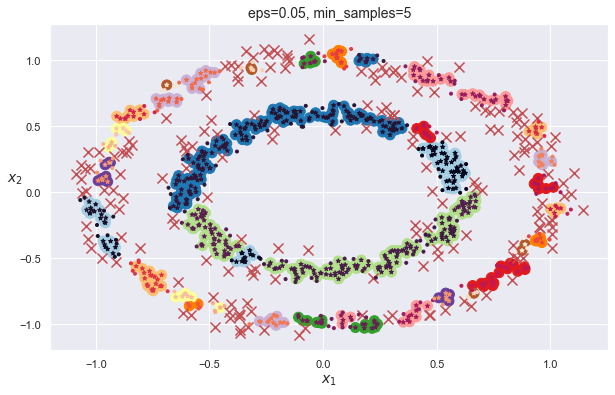

In [19]:
plt.figure(figsize=(10, 6))
plot_dbscan(dbscan, X, size=100)
plt.show()

## Improve the Quality of Clustering

We can improve the quality of the clustering as follows.

- **Fine-tune** how dense our clusters must be by adjusting the min_samples parameter.
- Control the number of clusters by the eps parameter.

In the above figure we have so many clusters because the epsilon parameter was very small. I.e., the radius of the neighborhoods around a data point was very small.

Below we increase epsilon to **reduce the number of clusters**. 

In [20]:
dbscan2 = DBSCAN(eps=0.1, min_samples=5)
dbscan2.fit(X)

DBSCAN(eps=0.1)

In [21]:
np.unique(dbscan2.labels_)

array([-1,  0,  1], dtype=int64)

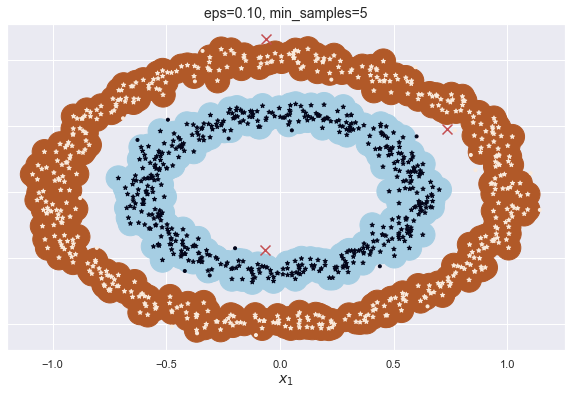

In [22]:
plt.figure(figsize=(10, 6))

plot_dbscan(dbscan2, X, size=600, show_ylabels=False)

plt.show()

1000
(1000, 2)


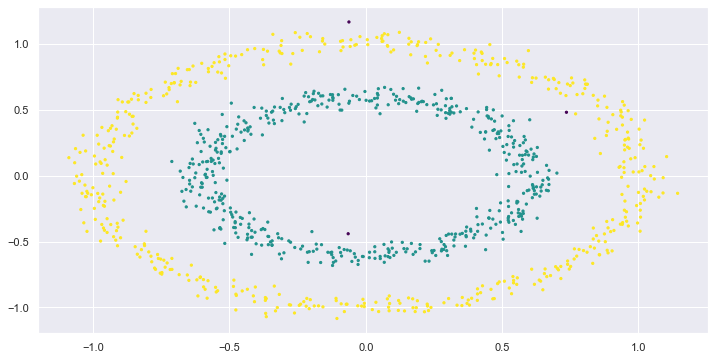

In [23]:
labels = dbscan2.labels_

print(len(labels))

print(X.shape)

plt.figure(figsize=(12, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, s=5, cmap='viridis');

## Observation

We see that by increasing epsilon DBSCAN is able to discover two clusters that we had in the original dataset.

## Increase the Density of the Clusters

We can increase the density of the clusters by adjusting the min_samples parameter.

We increase the min_samples parameter in the above model.

In [24]:
dbscan3 = DBSCAN(eps=0.1, min_samples=12)
dbscan3.fit(X)

DBSCAN(eps=0.1, min_samples=12)

In [25]:
np.unique(dbscan3.labels_)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7], dtype=int64)

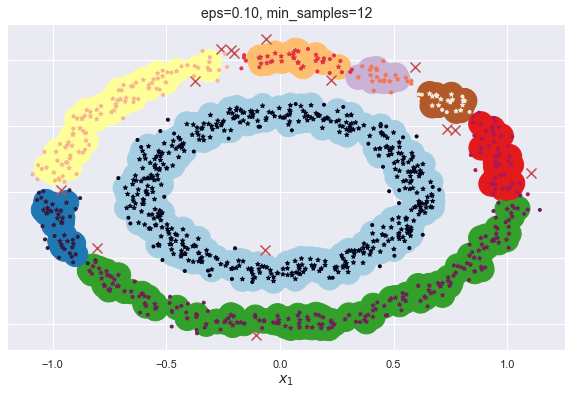

In [26]:
plt.figure(figsize=(10, 6))

plot_dbscan(dbscan3, X, size=600, show_ylabels=False)

plt.show()

## Observation

We observe that as we try to increase the density of the previous two clusters, DBSCAN does so by **increasing the number of clusters**.


        Thus, we should be able to perform fine-tuning of the eps and mon_samples parameters to discover the optimal number of clusters.